<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-97/blob/main/semana4/actividad-semana4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *   Nombre de la entrega: Actividad Semanal -- 4
# *   Nombre: Oscar Villa Cardenas
# *   Matricula: A01794052
# *   Materia: Ciencia y Analitica
# *   Profesor: Jobish Vallikavungal Devassia
# *   Fecha: 2022-10-05

In [223]:
import pandas as pd
import numpy as np

# Principal components analysis (PCA) 

* Es un metodo util para la reduccion de la dimension, especialmente cuando el numero de la variables es demasiado largo.
* Se pretende que PCA se utilize con variables numericas. 
   * Para variables categoricas, otros metodos como correspondence analysis son mas adecuados. 

In [224]:
customers_default_payments = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [225]:
customers_default_payments_df = pd.read_csv(customers_default_payments)
df = customers_default_payments_df.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [226]:
df.shape

(30000, 25)

Por cada records, los datos incluyen 18 variables numericas, y nosotros estamos interesados en reducir esta dimension.

Principal Component Analysis puede decirte que variables en tus datos son los mas importantes.

Nos enfocamos primero en dos variables: `X6` and consumer `X7`: 

In [227]:
ndf = df[['X6', 'X7']]
ndf.corr()

,X6,X7
X6,1.000000,0.672145
X7,0.672145,1.000000


In [228]:
df.X6.mean().round(2)

-0.02

In [229]:
df.X7.mean().round(2)

-0.13

limpiamos los datos

In [230]:
X6Mean = df['X6'].mean()
df['X6'].fillna(value = X6Mean, 
                    inplace = True)
print(X6Mean)
df['X6'].skew()

-0.016634996833016634


0.7319021059472196

In [231]:
X7Mean = df['X7'].mean()
df['X7'].fillna(value = X7Mean, 
                    inplace = True)
print(X7Mean)
df['X7'].skew()

-0.13368894815802634


0.7904711273867346

Removing categorical values

In [232]:
customers_default_payments_df.drop(['X2'], axis=1, inplace = True)
customers_default_payments_df.drop(['X3'], axis=1, inplace = True)
customers_default_payments_df.drop(['X4'], axis=1, inplace = True)

In [233]:
Varience = np.cov([df.X6, df.X7])
Varience

array([[1.2628654 , 0.90424424],
       [0.90424424, 1.43317802]])

In [234]:
ndf = df[['X6','X7']]
ndf.var().sum()

2.6960434165961082

In [235]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [236]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of X6 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X7 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 2.7
Varience prop. of X6 	: 46.84 %
Varience prop. of X7 	: 53.16 %


If nos desasemos de `X7` por el hecho de querer reducir la dimension, perderiamos por lo menos 53% de la variabilidad total. 

In [237]:
ndf.corr().round(2)

,X6,X7
X6,1.00,0.67
X7,0.67,1.00


Hablando aproximadamente, 67% de la variacion total en ambas variables es actualmente “co-variacion,” o variacion en una variable que esta duplicada by similar variation in the other variable. 

La linea `z1 (first principal component = PC1)` es la direccion en la cual la variabilidad del punto es la mas grande. 

La `z2 (second principal component = PC2)`-es ecogida para estar perpendicular al axis del z1.  

In [238]:
import seaborn as sns

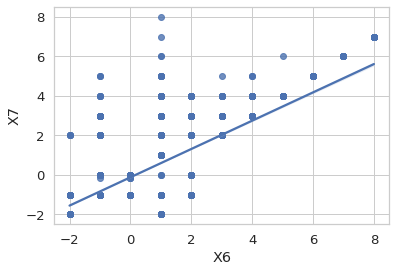

In [239]:
p = sns.regplot(data = df,  
                x = df.X6, 
                y = df.X7
               ) 
p

In [240]:
import numpy as np
from sklearn.decomposition import PCA

Inicializamos los PCA con 2 componentes

In [241]:
pcs = PCA(n_components=2)

pcs.fit(df[['X6', 'X7']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.502087,0.836881,0.836881
1,0.663157,0.163119,1.000000


Mostramos la desviacion estandar, la proporcion de varianza y la proporcion acumulativa

In [242]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,1.50,0.66
Proportion of variance,0.84,0.16
Cumulative proportion,0.84,1.00


In [243]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,1.5021,0.6632
Proportion of variance,0.8369,0.1631
Cumulative proportion,0.8369,1.0000


### Scree Plot

In [244]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Creamos la grafica del scree plot con X6 y X7

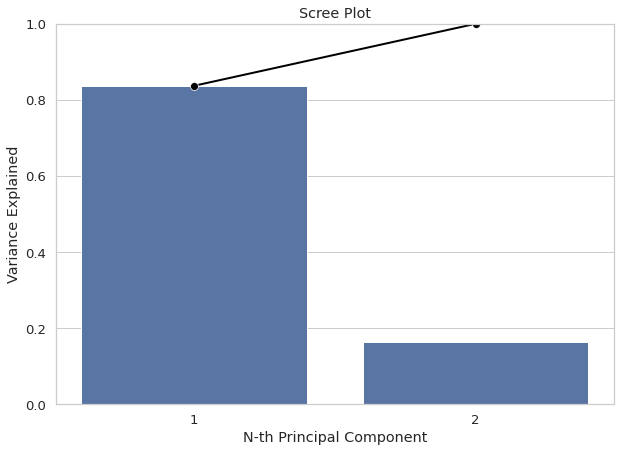

In [245]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Crea una nueva tabla con las columnas PC1 y PC2 con indices X6 y X7 con los componentes utilizando el metodo transpose que regresa una vista de los arreglos con los axes transpuestos.

In [246]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X6', 'X7']
                                )
pcsComponents_df

,PC1,PC2
X6,0.673142,-0.739513
X7,0.739513,0.673142


Creamos una nueva tabla con las columnas X y Y

In [247]:
scores = pd.DataFrame(pcs.transform(df[['X6', 'X7']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,2.935373,-0.055052
1,0.915946,2.163487
2,0.110062,0.077690
3,0.110062,0.077690
4,-0.563080,0.817203


Creamos una nueva tabla mostrando la desviacion estandard, la proporcion de la varianza y la proporcion acumulativa

In [248]:
pcs = PCA()
pcs.fit(customers_default_payments_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Standard deviation,155841.858701,37338.073642,27844.166817,21440.998640,20314.589407,18522.679643,17040.035861,16327.241339,11623.458479,10435.755871,8786.471848,8201.498865,2.260728e+00,9.428016e-01,7.333037e-01,5.967751e-01,5.120727e-01,4.186440e-01,3.867699e-01
Proportion of variance,0.848680,0.048717,0.027092,0.016064,0.014421,0.011989,0.010147,0.009315,0.004721,0.003806,0.002698,0.002351,1.785962e-10,3.106106e-11,1.879072e-11,1.244506e-11,9.163024e-12,6.124425e-12,5.227341e-12
Cumulative proportion,0.848680,0.897397,0.924489,0.940553,0.954974,0.966963,0.977110,0.986425,0.991146,0.994952,0.997649,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Scree Plot

Creamos una nueva grafica scree plot con todos los valores

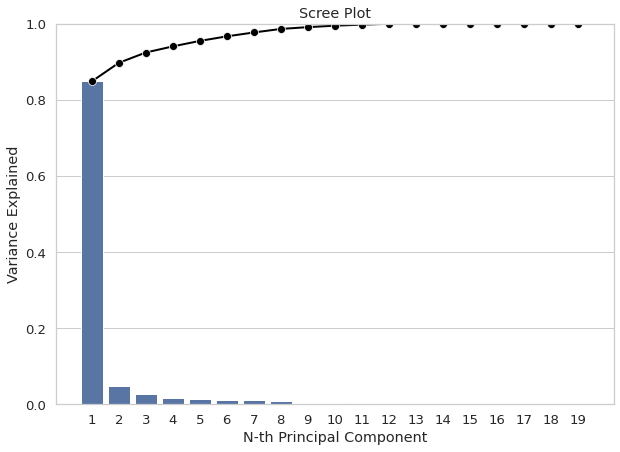

In [249]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Observamos que el primer valor es el que tiene mas varianza

Creamos una nueva tabla con todas las columnas mostrando su desviacion estandard, proporcion de varianza y proporcion acumulativa

In [250]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Standard deviation,155841.8587,37338.0736,27844.1668,21440.9986,20314.5894,18522.6796,17040.0359,16327.2413,11623.4585,10435.7559,8786.4718,8201.4989,2.2607,0.9428,0.7333,0.5968,0.5121,0.4186,0.3868
Proportion of variance,0.8487,0.0487,0.0271,0.0161,0.0144,0.0120,0.0101,0.0093,0.0047,0.0038,0.0027,0.0024,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.8487,0.8974,0.9245,0.9406,0.9550,0.9670,0.9771,0.9864,0.9911,0.9950,0.9976,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Imprimimos los componentes de pcs

In [251]:
pcs.components_

array([[ 1.37305149e-06,  1.81982545e-06,  1.80128215e-06,
         1.81900124e-06,  1.85079913e-06,  1.91465813e-06,
         4.46555462e-01,  4.40877070e-01,  4.29192025e-01,
         3.97480521e-01,  3.69459826e-01,  3.52644584e-01,
         2.49822873e-02,  2.84025166e-02,  2.38452205e-02,
         1.93468667e-02,  1.90038654e-02,  2.06262868e-02,
        -3.75264587e-08],
       [-1.19529061e-06, -1.49975730e-06, -3.84326704e-07,
         1.25822191e-06,  2.66369448e-06,  3.67300317e-06,
        -5.48935385e-01, -3.93843775e-01, -5.02997215e-02,
         2.57543542e-01,  4.24101453e-01,  4.79661871e-01,
         4.36479153e-02,  1.69387922e-01,  1.41916930e-01,
         1.00113321e-01,  6.20413986e-02, -1.22921559e-02,
         5.61301046e-08],
       [-3.94514107e-06, -4.19703573e-06, -3.31806409e-06,
        -1.27930013e-06, -2.27079169e-06, -3.57919631e-06,
        -1.90177646e-01, -3.57746150e-02,  5.38449125e-01,
         6.85906494e-02, -2.06058063e-01, -3.11922694e-01,
    

Creamos una nueva tabla con los componentes de pcs usando el metodo transposeeñ cual regresa una vista del arreglo con los axes transpuestos.

In [252]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = customers_default_payments_df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
X6,1.373051e-06,-1.195291e-06,-3.945141e-06,-0.000008,1.919924e-06,-1.869379e-06,8.957744e-07,3.204347e-07,3.399382e-06,4.384420e-06,1.952126e-06,5.289203e-07,0.336051,-6.247495e-01,-6.200671e-01,2.774630e-01,-1.402140e-01,-2.369329e-02,1.227491e-01
X7,1.819825e-06,-1.499757e-06,-4.197036e-06,-0.000008,2.305597e-06,-2.736507e-06,8.258552e-07,-5.841227e-07,2.584283e-06,5.534762e-06,3.017595e-06,1.689199e-06,0.423052,-4.252440e-01,2.922328e-01,-5.792116e-01,4.552343e-01,1.097866e-01,4.129954e-03
X8,1.801282e-06,-3.843267e-07,-3.318064e-06,-0.000009,8.172153e-07,3.533128e-06,2.675085e-07,-5.013228e-07,1.684720e-06,4.256297e-06,1.814341e-07,1.321154e-06,0.441451,-1.051610e-01,5.662568e-01,1.485750e-01,-6.223003e-01,-2.522510e-01,2.127748e-02
X9,1.819001e-06,1.258222e-06,-1.279300e-06,-0.000010,2.001431e-06,7.634436e-07,1.377877e-06,-1.468513e-06,3.575599e-06,8.130098e-07,1.920327e-06,3.355409e-06,0.435550,2.416363e-01,1.532405e-01,5.767689e-01,3.270089e-01,5.372185e-01,-1.497425e-02
X10,1.850799e-06,2.663694e-06,-2.270792e-06,-0.000009,-1.241451e-06,-9.055027e-07,-5.618409e-07,-6.693577e-07,5.425640e-06,2.962751e-06,4.756611e-07,-7.456051e-07,0.411211,3.936974e-01,-1.986429e-01,4.829394e-02,3.471123e-01,-7.162895e-01,2.363492e-02
X11,1.914658e-06,3.673003e-06,-3.579196e-06,-0.000007,8.528811e-07,2.829324e-09,3.291314e-06,1.266949e-06,4.943481e-06,4.302464e-06,-1.078469e-06,2.551500e-06,0.389491,4.449623e-01,-3.769500e-01,-4.789664e-01,-3.974446e-01,3.474794e-01,-1.004010e-02
X12,4.465555e-01,-5.489354e-01,-1.901776e-01,0.313628,7.877403e-02,-4.581596e-01,8.312471e-03,7.776721e-02,1.710493e-01,-2.671135e-01,-2.046138e-01,-4.596279e-03,0.000005,1.983188e-06,7.941251e-07,1.191124e-06,-1.341441e-06,-2.679172e-07,-6.369010e-07
X13,4.408771e-01,-3.938438e-01,-3.577461e-02,0.028667,-7.562369e-02,5.263058e-01,-6.475534e-02,1.034436e-01,1.232299e-02,3.512461e-01,4.764986e-01,1.502152e-02,-0.000005,2.574081e-06,-1.752298e-06,-2.148707e-07,1.033805e-06,3.203379e-07,1.228668e-07
X14,4.291920e-01,-5.029972e-02,5.384491e-01,-0.333122,2.297394e-01,3.110302e-02,7.947392e-02,-1.176714e-01,-3.360884e-01,1.534884e-01,-4.415856e-01,-8.333317e-02,-0.000002,-3.267588e-07,-1.165919e-06,-1.075397e-06,7.597110e-07,-3.006159e-07,4.613652e-08
X15,3.974805e-01,2.575435e-01,6.859065e-02,-0.247256,-5.475081e-01,-1.774123e-01,-2.289582e-01,-1.017887e-01,-1.411016e-01,-3.723193e-01,2.331606e-01,3.208149e-01,-0.000002,-1.946885e-06,-2.656859e-07,-1.593905e-06,-1.618057e-06,2.872016e-07,-5.961611e-08


Importamos preprocessing desde sklearn

In [253]:
from sklearn import preprocessing

Mostramos las primeras 5 lineas del dataframe customers_default_payments

In [254]:
customers_default_payments_df.iloc[:, 3:].head()

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Inicializamos PCA y utilizamos el metodo fit el cual entrena el modelo con X, y al final regresa una instancia del mismo

In [255]:
pcs = PCA()
pcs.fit(preprocessing.scale(customers_default_payments_df.iloc[:, 3:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.

PCA()

Creamos una tabla que muestra la desviacion estandard, la proporcion de varianza y la proporcion acumulativa

In [256]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Standard deviation,2.5542,1.9538,1.2268,0.9775,0.9516,0.9418,0.9338,0.8847,0.8557,0.7938,0.6312,0.5101,0.5002,0.4346,0.3632,0.2650,0.2023,0.1591,0.1524
Proportion of variance,0.3434,0.2009,0.0792,0.0503,0.0477,0.0467,0.0459,0.0412,0.0385,0.0332,0.0210,0.0137,0.0132,0.0099,0.0069,0.0037,0.0022,0.0013,0.0012
Cumulative proportion,0.3434,0.5443,0.6235,0.6738,0.7214,0.7681,0.8140,0.8552,0.8937,0.9269,0.9479,0.9615,0.9747,0.9847,0.9916,0.9953,0.9974,0.9988,1.0000


In [257]:
pcsSummary_df.iloc[2,12]

0.9747135093264955

* Ahora encontramos que necesitamos 10 principal components para obtener mas del 90% del total de variabilidad. 
* Los 2 primeros principal components solo acumulan 54% del total de la variabilidad, reduciendo el numero de variables a 2 significaria que perderiamos mucha informacion. 

In [263]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=customers_default_payments_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:9]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
X6,0.172376,-0.306206,-0.008930,0.266477,0.052736,-0.037462,-0.003888,-0.018450,-0.007116
X7,0.205947,-0.337362,0.039130,0.095976,-0.057649,-0.000158,-0.023332,-0.002658,0.002007
X8,0.212077,-0.346138,0.093375,-0.046937,-0.069764,-0.008545,-0.020679,-0.023983,-0.110578
X9,0.218647,-0.347187,0.129728,-0.157040,-0.078317,-0.011903,0.018104,-0.047996,0.011690
X10,0.222068,-0.333373,0.148690,-0.207110,-0.042638,0.022167,0.021311,0.080205,0.040441
X11,0.216735,-0.305843,0.147746,-0.209005,-0.014819,0.107624,-0.032248,0.028760,0.056778
X12,0.329669,0.167884,-0.220665,0.037436,-0.042754,-0.028708,-0.058605,0.010400,0.007815
X13,0.341238,0.169916,-0.189425,-0.001340,0.006676,-0.082073,-0.043753,-0.036817,-0.135512
X14,0.345102,0.176340,-0.126184,-0.022176,0.026731,-0.141064,0.080304,-0.123405,0.097415
X15,0.349229,0.174360,-0.114608,-0.027467,0.079485,-0.043472,0.025221,0.124573,0.035144


In [259]:
pcsComponents_df.PC1.idxmax()

'X15'

In [260]:
pcsComponents_df.PC1.nlargest(3)

X15    0.349229
X16    0.347177
X14    0.345102
Name: PC1, dtype: float64

In [261]:
pcsComponents_df.PC2.idxmin()

'X9'

In [262]:
pcsComponents_df.PC2.nsmallest(3)

X9   -0.347187
X8   -0.346138
X7   -0.337362
Name: PC2, dtype: float64

# Preguntas

1.   ¿Cuál es el número de componentes mínimo y por qué?
  El numero de componentes minimos es 10 porque 10 representan mas del 90% del total de variabilidad
2.   ¿Cuál es la variación de los datos que representan esos componentes? Entre 0.03 y 0.07
3.   ¿Cuál es la pérdida de información después de realizar PCA? 7.31%
4.   De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales? Parece que X9 es el que tiene menor importancia mientras que X15 parece ser el que tiene mayor importancia
5.   ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning? PCA nos puede ayudar a mejorar el performance a un costo muy bajo del accuracy del modelo. 
Otros beneficios de PCA incluye reduccion de ruido en los datos, seleccion de features (hasta cierto nivel), y la habilidad de producir independiente y no relacionados features para los datos